In [150]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind

In [151]:
geq = pd.read_csv("../GEQ/GEQ_scores.csv", dtype={"Player Number": np.int64}, decimal=",").set_index("Player Number")
ftq = pd.read_csv("../FTQ/FTQ_scores.csv", dtype={"Player Number": np.int64}).set_index("Player Number")
hr = pd.read_csv("../Processed/hr_summary.csv", dtype={"player": np.int64}, decimal=".").set_index("player")
gameplay = pd.read_csv("../Processed/player_stats.csv", dtype={"player": np.int64}, decimal=".").set_index("player")

In [152]:
full_set = geq.join(ftq).join(hr).join(gameplay)

<Axes: >

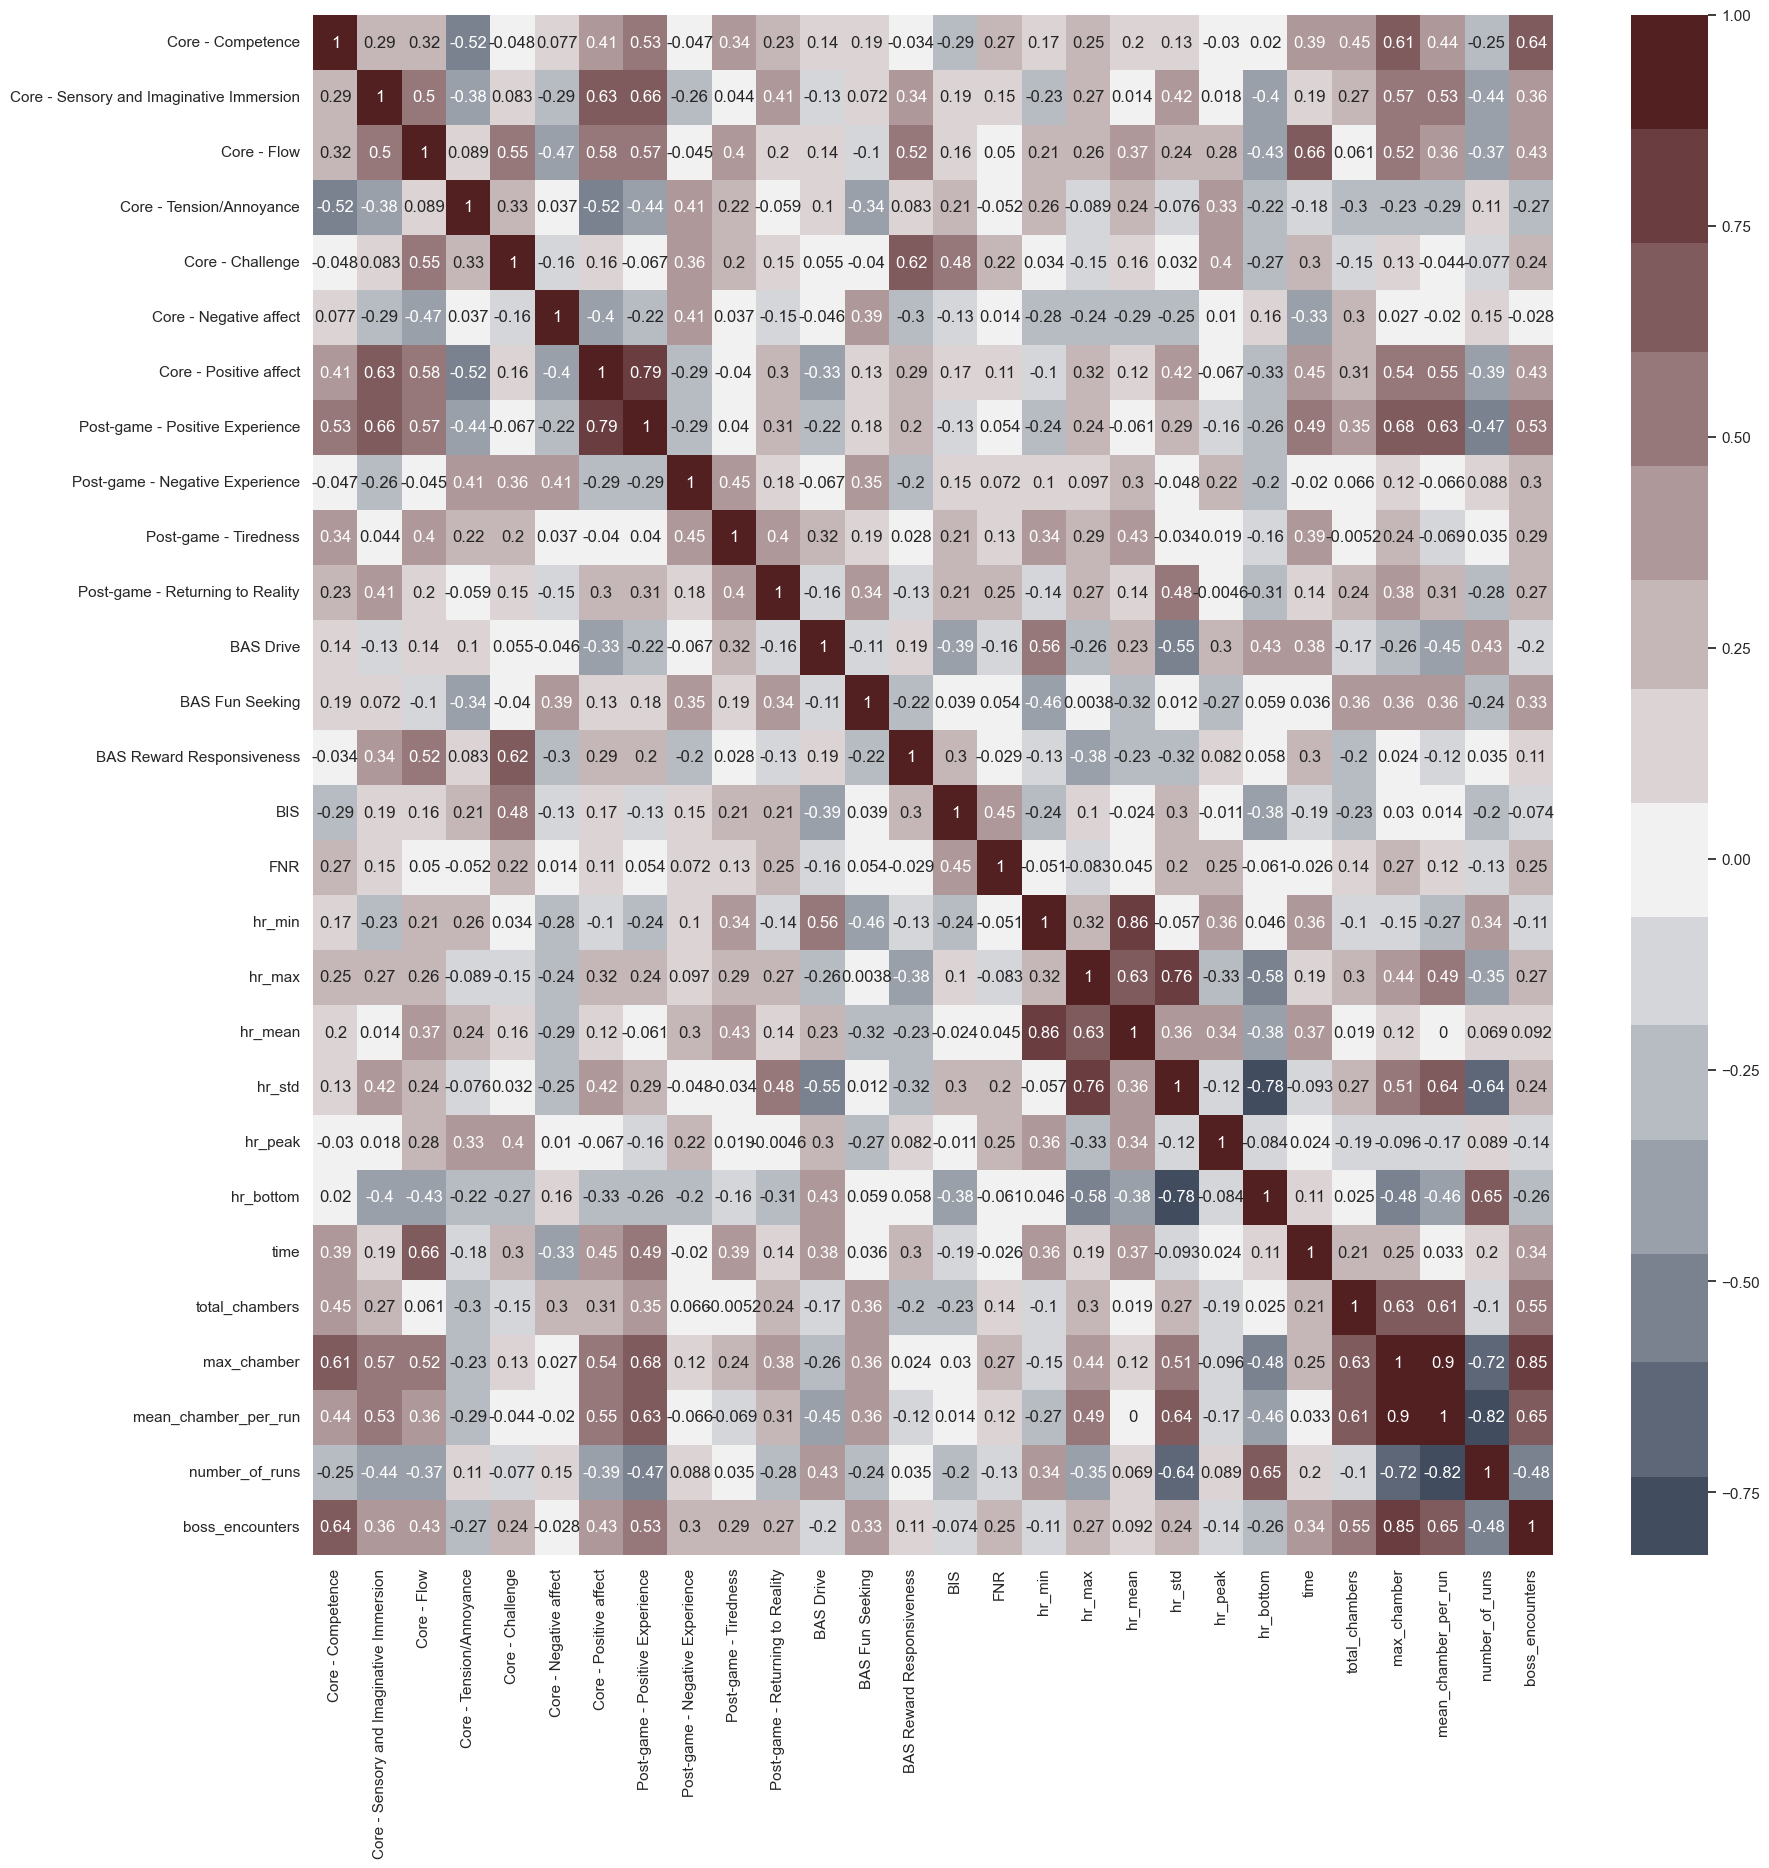

In [153]:
corr = full_set.corr(method="spearman")
sb.set(rc={'figure.figsize':(20,20)})
sb.heatmap(corr, annot=True, center=0, cmap=sb.diverging_palette(250, 10, n=15,s=50,l=20))

In [154]:
beginners = full_set[:][full_set["max_chamber"] < 9]
pro = full_set[:][full_set["max_chamber"] >= 9]

for c in full_set.columns:
    print(f"beginner {c}: {beginners[c].mean()}, pro {c}: {pro[c].mean()}, p-value: {ttest_ind(beginners[c], pro[c], equal_var=False)[1]}")

beginner Core - Competence: 2.0444444444444447, pro Core - Competence: 2.7454545454545456, p-value: 0.04185171609603979
beginner Core - Sensory and Imaginative Immersion: 2.370370370333333, pro Core - Sensory and Imaginative Immersion: 2.8787878788181818, p-value: 0.1167615420921825
beginner Core - Flow: 2.5777777777777775, pro Core - Flow: 3.272727272727273, p-value: 0.028094083094258714
beginner Core - Tension/Annoyance: 1.0370370371222224, pro Core - Tension/Annoyance: 0.9696969697, p-value: 0.8472069476351977
beginner Core - Challenge: 2.1333333333333337, pro Core - Challenge: 2.4000000000000004, p-value: 0.25650964295178846
beginner Core - Negative affect: 0.5, pro Core - Negative affect: 0.5, p-value: 1.0
beginner Core - Positive affect: 2.8666666666666663, pro Core - Positive affect: 3.4909090909090907, p-value: 0.009365130443999278
beginner Post-game - Positive Experience: 1.6481481480666667, pro Post-game - Positive Experience: 2.4393939394545456, p-value: 0.013173182102271383